In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In this machine learning project with Python, we will be using using examples of supervised and unsupervised machine learning with a dataset from the UCI Repository called MAGIC Gamma Telescope Dataset. This telescope records interactions with gamma and hadron particles. The dataset contains 10 variables based on measurements made by the telescope. We will use these variables to predict whether the particle that caused the rection was "gamma" or "hadron".

Artifical Intelligence (AI): An area of computer science where the goal is to enable computers and machines to perform human-like tasks and simulate human behaviour.

Machine Learning (ML): A subset of AI that tries to solve a specific problem and make predictions using data.

Data Science (DS): A field that attempts to find patterns and draw insights from data (might use ML).

Supervised Learning: Using labeled inputs (the input has a corresponding output label) to train models and learn outputs.

Unsupervised Learning: Uses unlabeled data to learn about patterns in data.

Reinforcement Learning: Agent learning in interactive environment based on rewards and penalties.

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of Czech Republic savicky'@'cs.cas.cz

In [46]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("C:/JPEM_Git_Main/JPEM/JPEM_FreeCodeCamp/data/magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [47]:
# Indetify unique class types in the last column "class"
df['class'].unique()

# Recode these labels "g" (gamma) and "h" (hadron) as numeric values. All gamma's detected will recode as 1, hadrons will become 0

df['class'] = (df['class'] == 'g').astype(int)

SUPERVISED LEARNING
Qualitative - categorical data; finite number of categories or groups with no inherent order. We use one-hot encoding to match our data to one category (1 if it matches, 0 if it doesn't). We can work on nominal data (no inherent order, eg: color, gender, flavour), or ordinal data (inherent order, eg: age, satisfaction level, rank).

One-Hot Encoding:
Country:
USA         [1,0,0,0]
India       [0,1,0,0]
Canada      [0,0,1,0]
France      [0,0,0,1]

Quantitative - numerical data (discrete or continuous); Discrete - integers, or continuous - all real numbers. Length & temperature are examples of continuous data as they can be subdivided. Quantity of items in a grocery cart, number of students in a classroom are all discrete as they cannot be subdivided. 

Output Prediction Types:
Classification - predicts discrete classes (multiclass classification, species, fruit type, animal type) or Bindary Classification (is it? or is it not? positive or negative, spam or not spam)

Regression - predicts continuous values. Stock price tomorrow, tomorrow's temperature, future house price.

Measuring loss in your model:

L1 Loss:
loss = sum(|Yreal - Ypredicted|)

L2 Loss:
loss = sum((Yreal-Ypredicted)^2)
Loss is less pronouced if the value is close

Accuracy





Exploratory Data Analysis (EDA)
Plotting a histogram of each variable (except 'class') will give us a quick look at possible relationships we can exploit between variables and class.

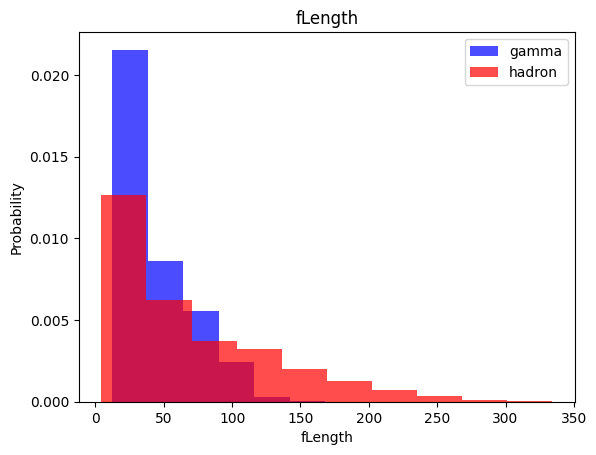

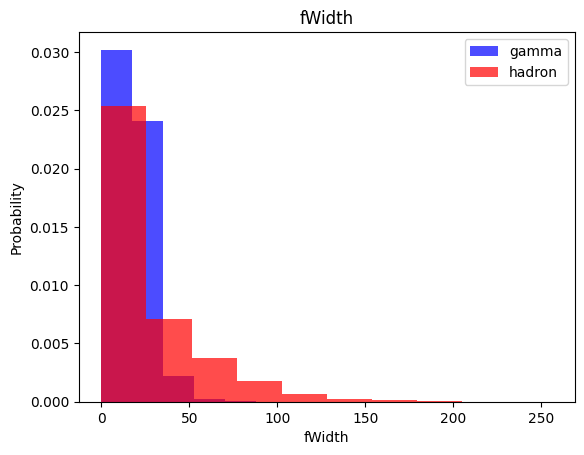

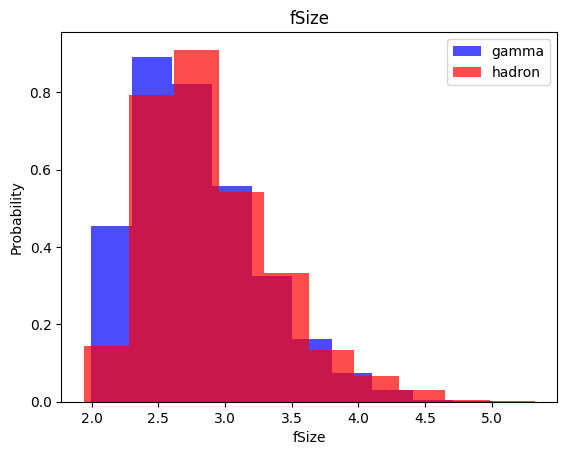

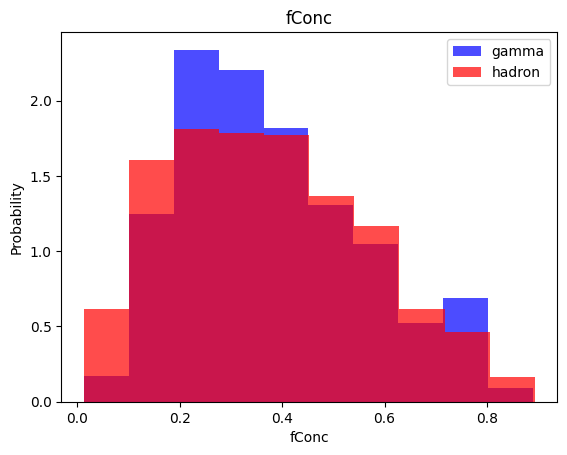

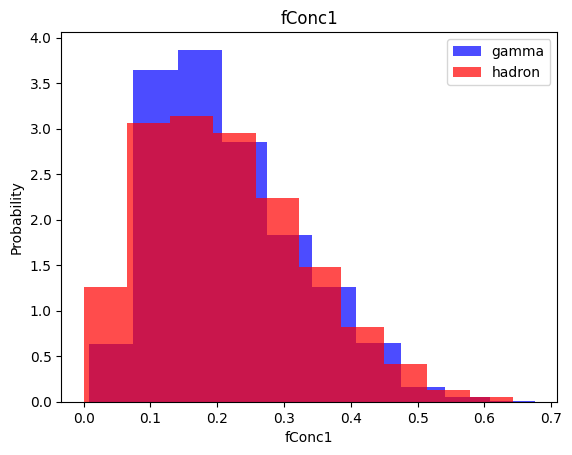

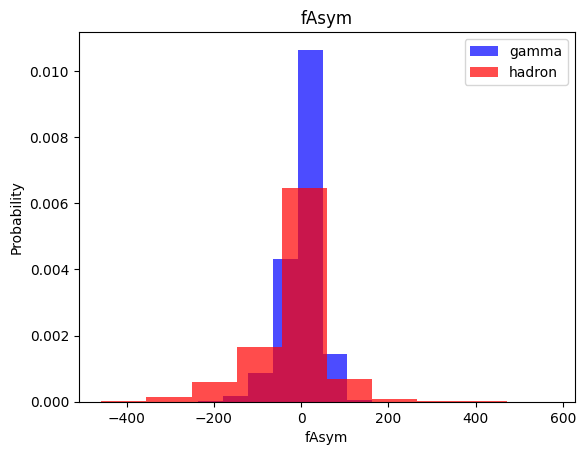

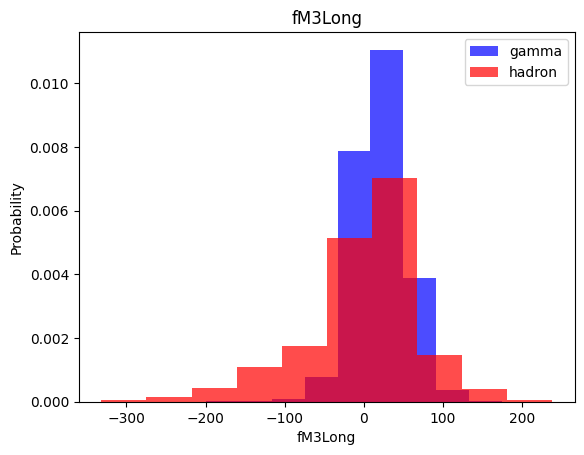

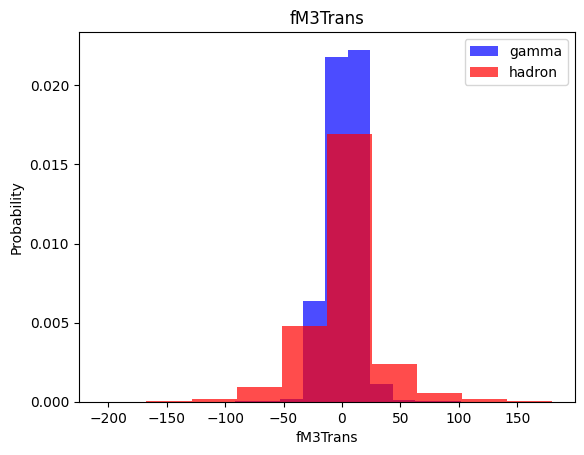

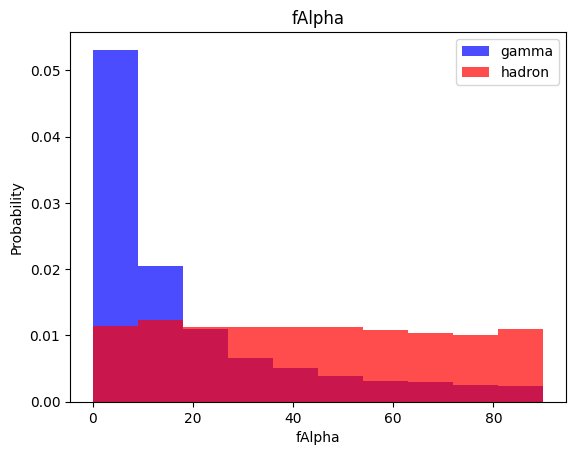

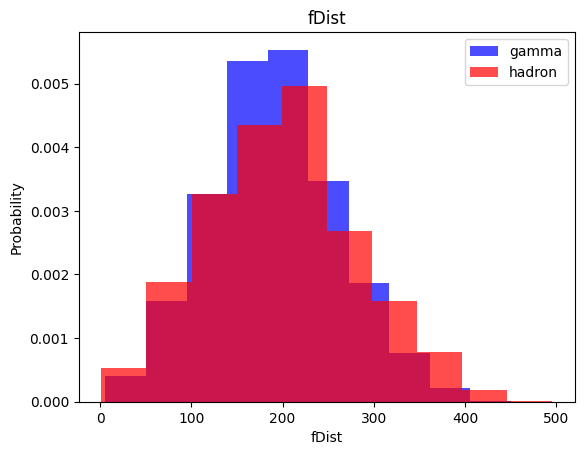

In [48]:
# plotting histograms of all gamma and hadron variables (value = 1)
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Training, validation and testing datasets

In [49]:
"""
    Everything between 0-60 percent will be used for training, between 60-80 percent will be used in validation,
    and 80-100 percent will be used for testing    
"""
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\jason\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [50]:
"""
The scale of the numbers from one variable to another are quite different so we need to scale (or normalize) these values.
Also, there are almost twice as many gamma values as hadron which can cause problems with our model.
"""
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0])) # hadron

def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
    
    data = np.hstack((x, np.reshape(y, (-1,1))))
    
    return data, x, y

7412
4000


In [51]:
train, x_train, y_train = scale_dataset(train, oversample=True)
# checking to see if oversampling created equal sized datasets
a = len(y_train)
b = sum(y_train == 1)
c = sum(y_train == 0)
print(a,b,c)

valid, x_valid, y_valid = scale_dataset(valid, oversample=False) # oversampling not necessary on data the model hasn't seen
test, x_test, y_test = scale_dataset(test, oversample=False)

14824 7412 7412


k Nearest Neighbours: Supervised ML (sklearn).
All sample points have labels. Create scatter plot of labeled data points. 
Measure Euclidian distance from new (unlabeled) data point and its neighbours to see which label it should receive.
K - how many neighbours to consider before assigning a label.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn_model.predict(x_test)
y_pred

# recall that Hadron = 0 and Gamma = 1. Our model s better at predicting Gamma's
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1339
           1       0.86      0.88      0.87      2465

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



Precision = True Positives / ( True Positives + False Positives) or TP/(TP+FP)
Recall = True Positives / (False Negatives + True Positives) or TP/(FN+TP), Recall is also known as Sensitivity

Naive Bayes: Supervised ML - It is used for classification tasks, where the goal is to predict the category or class of a given sample. The "naive" aspect refers to the assumption that the features used to make the classification are independent of each other, given the class. Despite this simplification, Naive Bayes classifiers can be remarkably effective and are widely used, especially in tasks like spam detection, document classification, and sentiment analysis.

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [56]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1339
           1       0.74      0.90      0.81      2465

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression ML: unlike Linear Regression with takes a continuous variable as input - Logistic Regression works with Categorical variables. Linear Regression produces an R2 value (%) but Logistic Regression produces a probability.

p = 1/(1+e^-(mx+b))

which is the sigmoid function

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [59]:
# we can use different penalties, l2 = quadratic
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1339
           1       0.84      0.82      0.83      2465

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector Machines ML (SVM): supervised machine learning algorithm used for both classification and regression tasks, though it is more commonly used in classification problems. SVM works by finding the hyperplane that best separates different classes in the feature space. The objective is to choose a hyperplane with the greatest possible margin between support vectors in the two classes, where the margin is defined as the distance between the hyperplane and the nearest points from each class. These nearest points are called support vectors, as they support the construction of the hyperplane. The process of finding this optimal hyperplane is an optimization problem.

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [62]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1339
           1       0.89      0.90      0.90      2465

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net ML: A (supervised) computational model inspired by the structure and function of the human brain's neural networks. It consists of interconnected units or nodes called artificial neurons, which process information by responding to external inputs and passing their output to subsequent neurons. The connections between these neurons have numerical weights that are tuned during the learning process, allowing the network to model complex patterns and behaviors.

Neural networks are the foundation of deep learning, a subset of machine learning where networks with many layers of neurons—deep architectures—learn representations of data with multiple levels of abstraction. 

In [63]:
import tensorflow as tf

In [64]:
def plot_history(history):
    fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Binary crossentropy')
    ax2.grid(True)
    
    plt.show()

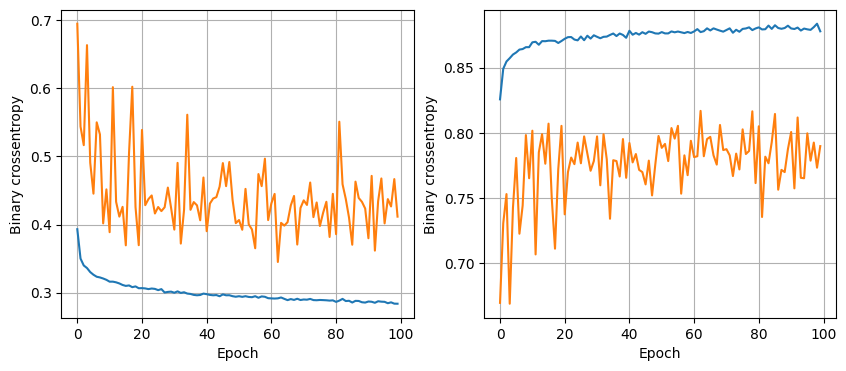

In [68]:
plot_history(history)

In [74]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), #  tf.keras.layers.Input(shape=(10,))  Explicit Input layer
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"nodes{num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [80]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

print(classification_report(y_test, y_pred))

  1/119 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1339
           1       0.88      0.94      0.91      2465

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



Regression Assumptions:
- Linearity: The relationship between the independent variables and the dependent variable is linear. In other words, the change in the dependent variable is proportional to the change in the independent variables, allowing for a straight-line relationship when plotted.

- Independence: The errors (residuals) of the model are independent of each other. In other words, the value of one observation's error should not be related to the value of another observation's error.

- Normality: The residuals of the model are normally distributed. It means that the distribution of the errors follows a bell-shaped curve around zero, indicating that most of the errors are small and centered around zero, with fewer errors farther away from zero.

- Homoskedasticity: (constant variance) The variance of the residuals is constant across all levels of the independent variables. In other words, the spread of the residuals should remain consistent as the values of the independent variables change, rather than increasing or decreasing systematically.

Evaluating Regression Results:
- Mean Absolute Error (MAE): Sum absolute value of all residual values, divide by number of datapoints.
- Mean Squared Error (MSE): Sum of square of residuals, divide by number of datapoints. Helps punish large errors.
- Root Mean Squared Error (RMSE): Square Root of MSE, easier to understand as the result is in the same units as the data.
- R Squared (Coefficient of Determination): 